In [123]:
import numpy as np #used to generate random numbers
import pandas as pd #used to store data in a dataframeimport matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [124]:
#load the    CSV    file into a pandas dataframe
df = pd.read_csv('winequality-red.csv')

In [125]:
df = pd.DataFrame(df)

In [126]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Normalization of all variables is suggested. Transformation of the following variables will take place to correct skewness and outliers:
fixed acidity, volitile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol.

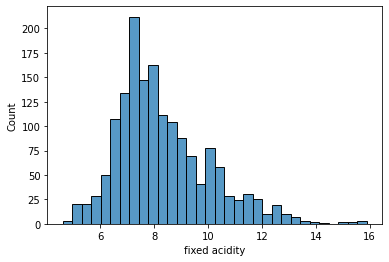

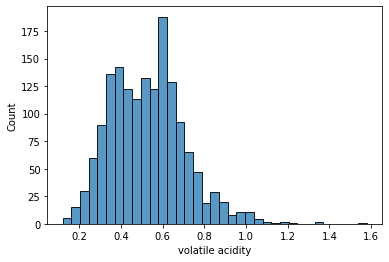

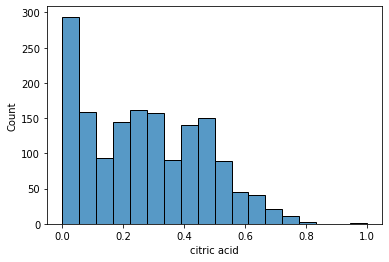

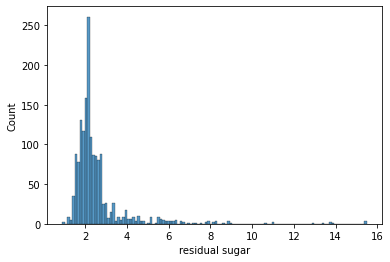

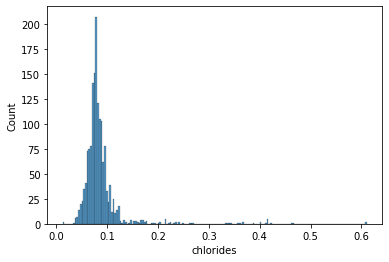

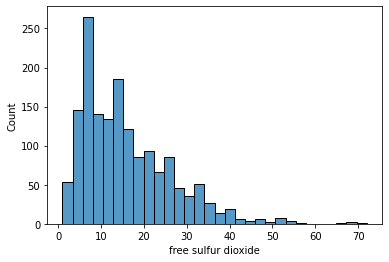

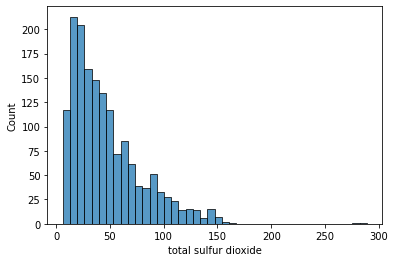

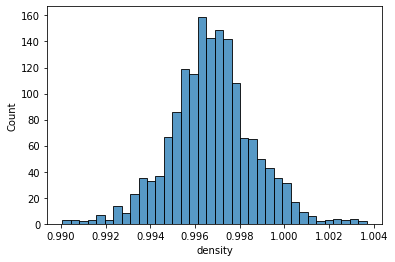

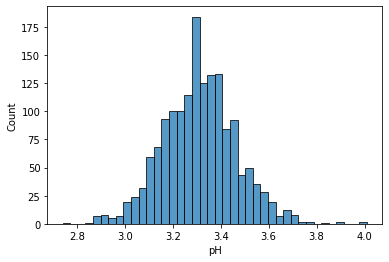

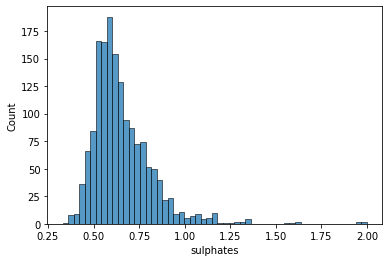

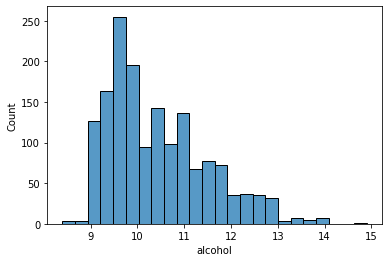

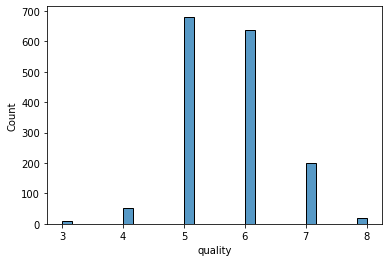

In [127]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

In [128]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [129]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [130]:
df.loc[:,'fixed acidity':'alcohol'] = normalize(df.loc[:,'fixed acidity':'alcohol'])

In [131]:
for i in range(len(df.quality)):
  if df.loc[i,'quality'] >=6:
    df.loc[i,'category'] = 'good'
  else:
    df.loc[i,'category'] = 'bad'

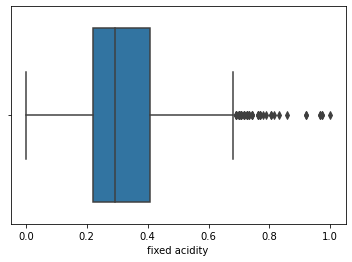

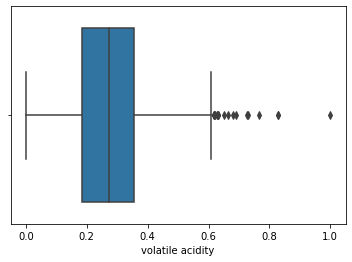

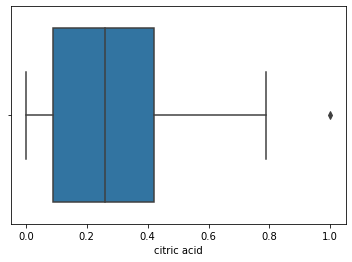

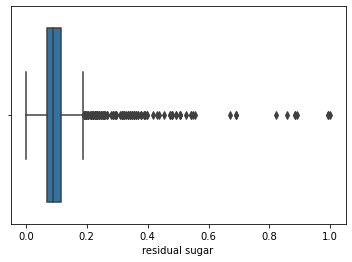

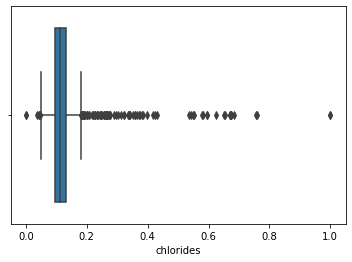

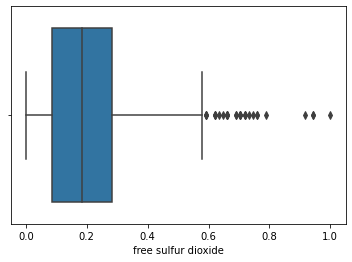

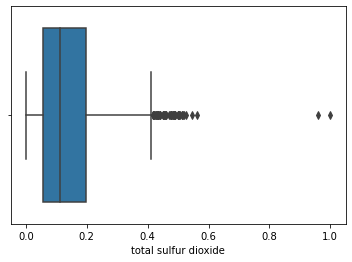

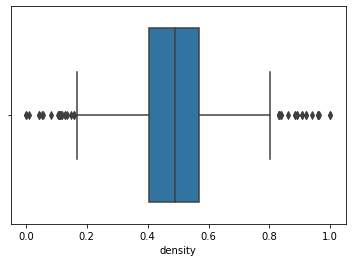

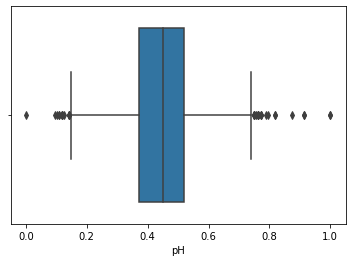

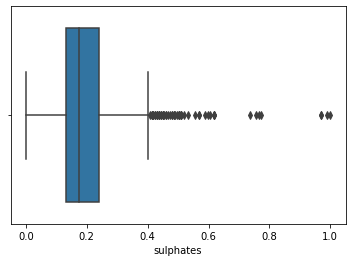

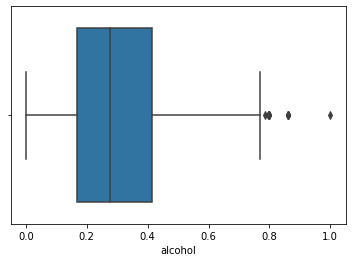

In [132]:
for x in df.loc[:,'fixed acidity':'alcohol']:
  plt.figure()
  sns.boxplot(x=df[x])

In [133]:
def IQR(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  return(IQR)

In [134]:
columns_transform = df[['citric acid','total sulfur dioxide','alcohol']]
IQR = IQR(columns_transform)
Q1 = columns_transform.quantile(0.25)
Q3 = columns_transform.quantile(0.75)

In [135]:
Q1[0]

0.09

In [136]:
IQR[1]

0.1413427561837456

In [137]:
df['citric acid'] = df['citric acid'][~((df['citric acid'] < (Q1[0] - 1.5 * IQR[0])) |(df['citric acid'] > (Q3[0] + 1.5 * IQR[0])))]

In [138]:
df['total sulfur dioxide'] = df['total sulfur dioxide'][~((df['total sulfur dioxide'] < (Q1[1] - 1.5 * IQR[1])) |(df['total sulfur dioxide'] > (Q3[1] + 1.5 * IQR[1])))]

In [139]:
df['alcohol'] = df['alcohol'][~((df['alcohol'] < (Q1[2] - 1.5 * IQR[2])) |(df['alcohol'] > (Q3[2] + 1.5 * IQR[2])))]

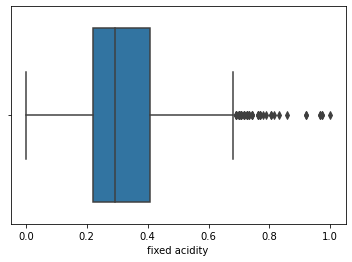

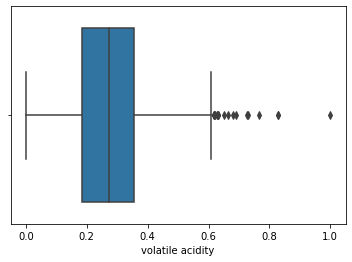

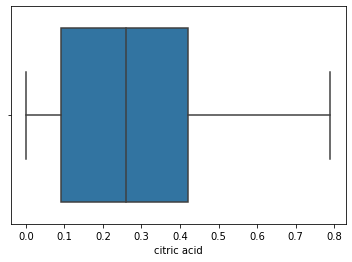

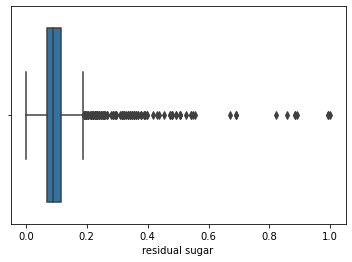

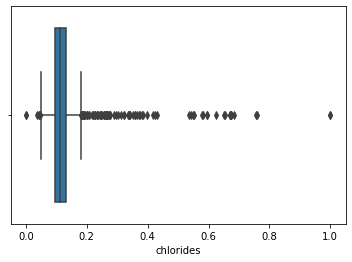

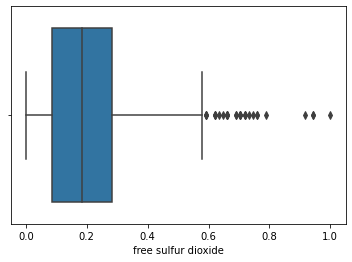

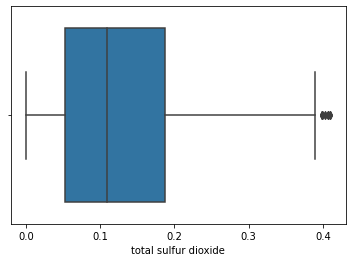

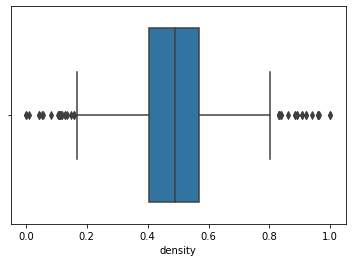

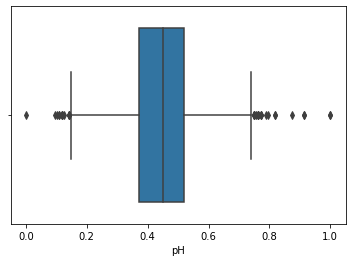

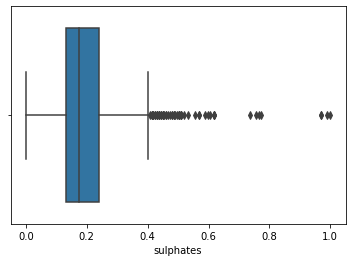

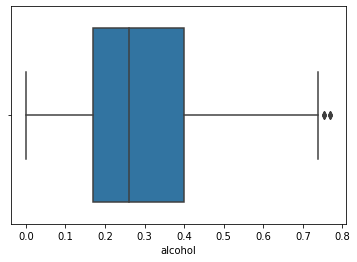

In [140]:
for x in df.loc[:,'fixed acidity':'alcohol']:
  plt.figure()
  sns.boxplot(x=df[x])

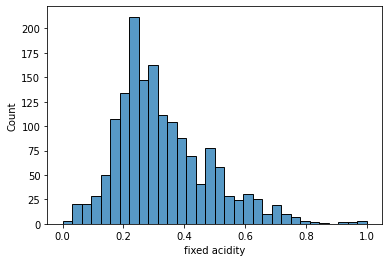

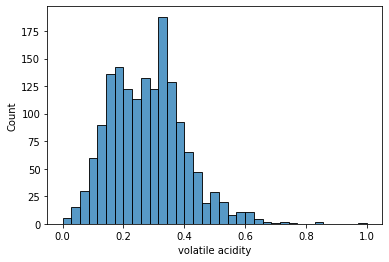

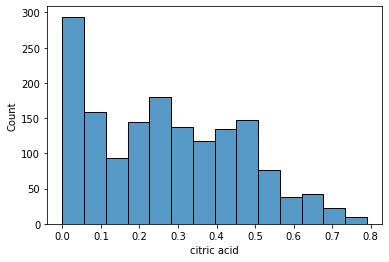

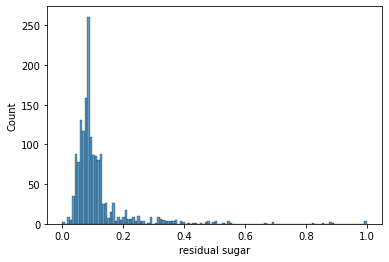

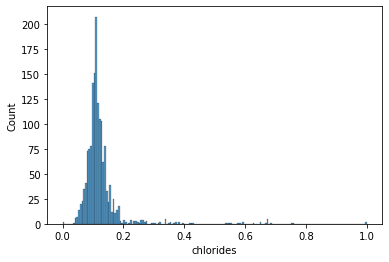

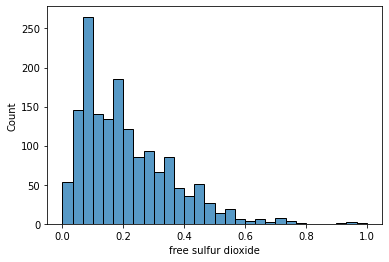

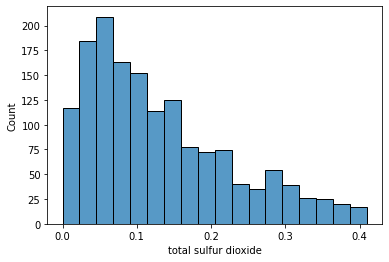

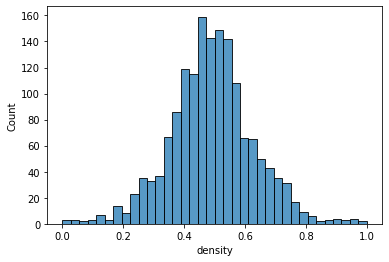

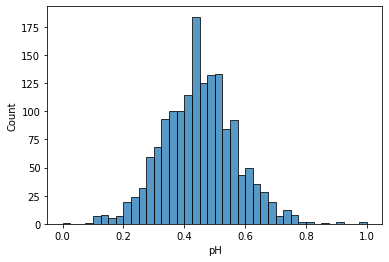

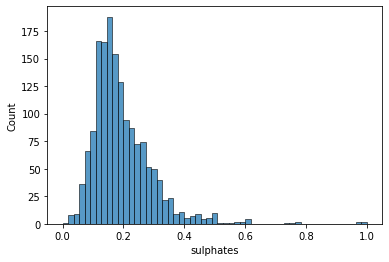

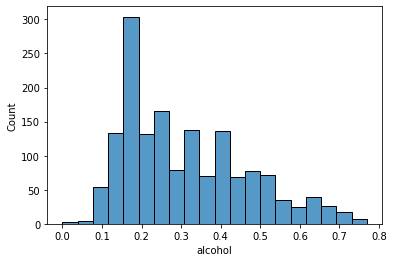

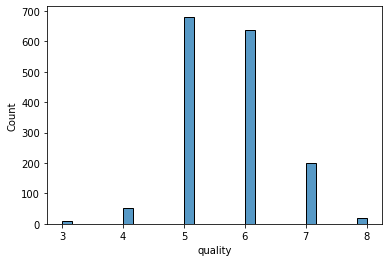

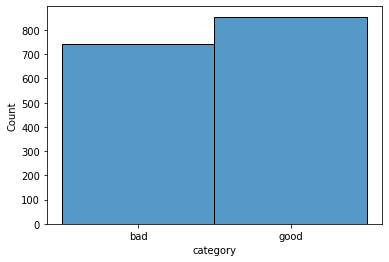

In [141]:
for i in df.columns:
  plt.figure()
  sns.histplot(data=df,x=i)

In [142]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
total sulfur dioxide,55,0.034396
alcohol,14,0.008755
citric acid,1,0.000625
category,0,0.000000
quality,0,0.000000
sulphates,0,0.000000
pH,0,0.000000
density,0,0.000000
free sulfur dioxide,0,0.000000
chlorides,0,0.000000


In [143]:
df['residual sugar'].values

array([0.06849315, 0.11643836, 0.09589041, ..., 0.09589041, 0.07534247,
       0.18493151])

In [144]:
df['residual sugar'] = np.log(df['residual sugar']+0.01)

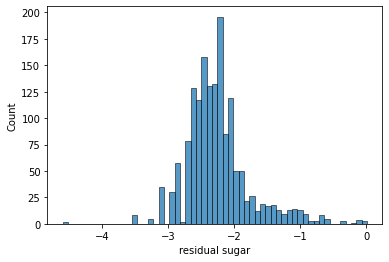

In [145]:
sns.histplot(data=df,x='residual sugar')

In [146]:
df['chlorides'] = np.log(df['chlorides']+0.01)

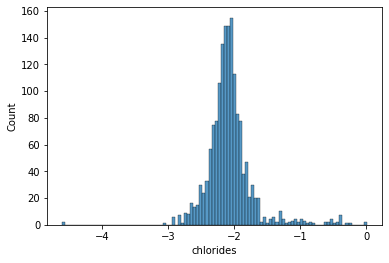

In [147]:
sns.histplot(data=df,x='chlorides')

In [148]:
df['sulphates'] = np.log(df['sulphates']+0.01)

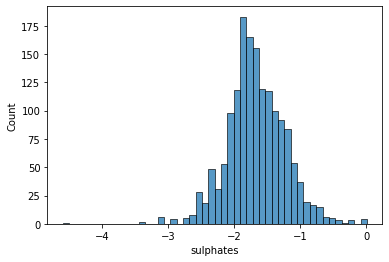

In [149]:
sns.histplot(data=df,x='sulphates')

In [153]:
df[['total sulfur dioxide','alcohol','citric acid']] = df[['total sulfur dioxide','alcohol','citric acid']].fillna(df[['total sulfur dioxide','alcohol','citric acid']].mean())

In [154]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
category,0,0.0
quality,0,0.0
alcohol,0,0.0
sulphates,0,0.0
pH,0,0.0
density,0,0.0
total sulfur dioxide,0,0.0
free sulfur dioxide,0,0.0
chlorides,0,0.0
residual sugar,0,0.0


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import array

In [187]:
X = df[['alcohol', 'sulphates','pH','density','total sulfur dioxide','free sulfur dioxide','chlorides','residual sugar','citric acid','volatile acidity','fixed acidity']]
y = df['quality']

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [185]:
X_test.shape

(4400, 1)

In [189]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [191]:
y_pred.shape

(400,)

In [177]:
df_test = pd.DataFrame()

In [201]:
df_test['Predicted'] = y_pred

In [194]:
y_test = np.array(y_test)

In [199]:
df_test['Actual_Number'] = y_test

In [202]:
df_test

,Actual_Number,Predicted
803,6,5
124,5,5
350,6,6
682,5,5
1326,6,6
...,...,...
1565,6,6
327,5,6
254,6,6
322,5,5


In [207]:
df_test['Actual_Category'] = True

In [228]:
df_test.loc[df_test['Actual_Number'] >= 6, "Actual_Category"] = "good"
df_test.loc[df_test['Actual_Number'] < 6, "Actual_Category"] = "bad"

In [231]:
df_test.loc[df_test['Predicted'] >= 6, "Predicted_Category"] = "good"
df_test.loc[df_test['Predicted'] < 6, "Predicted_Category"] = "bad"

In [232]:
df_test

,Actual_Number,Predicted,Actual_Category,Predicted_Category
803,6,5,good,bad
124,5,5,bad,bad
350,6,6,good,good
682,5,5,bad,bad
1326,6,6,good,good
...,...,...,...,...
1565,6,6,good,good
327,5,6,bad,good
254,6,6,good,good
322,5,5,bad,bad


In [233]:
cross_tab = pd.crosstab(df_test.Actual_Category,df_test.Predicted_Category)

In [236]:
cross_tab

Predicted_Category,bad,good
Actual_Category,,
bad,137,41
good,67,155


In [242]:
import seaborn as sn
from sklearn import metrics

Accuracy:  0.73


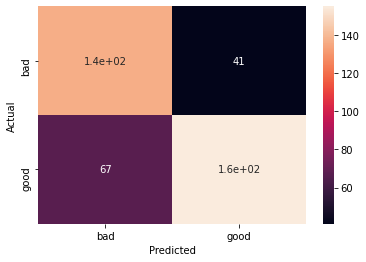

In [243]:
confusion_matrix = pd.crosstab(df_test.Actual_Category,df_test.Predicted_Category, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(df_test.Actual_Category,df_test.Predicted_Category))
plt.show()

In [244]:
filename = 'Wine_Quality_Prediction_Results.csv'
df_test.to_csv(filename,index=False)